# Reading in Climate Data with `xarray`

In [1]:
#Import libraries
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Load the netCDF dataset into an `xarray` object
fileName = 'macav2livneh_pr_bcc-csm1-1_r1i1p1_historical_1990_2005_CONUS_monthly.nc'
ds = xr.open_dataset(fileName)

In [3]:
#Extract the precipitation data into an xarray dataset object
ds = xr.open_dataset(fileName)

In [4]:
#Save the precipitation values into a single data array
arrPrecip = ds['precipitation']

In [5]:
#Display information about the arrPrecip data array
print(arrPrecip)

<xarray.DataArray 'precipitation' (time: 192, lat: 444, lon: 922)>
[78598656 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 25.16 25.22 25.28 25.34 25.41 25.47 25.53 25.59 ...
  * lon      (lon) float64 235.4 235.5 235.5 235.6 235.7 235.7 235.8 235.8 ...
  * time     (time) datetime64[ns] 1990-01-15 1990-02-15 1990-03-15 ...
Attributes:
    long_name:      Monthly Precipitation Amount
    units:          mm
    grid_mapping:   crs
    standard_name:  precipitation
    cell_methods:   time: sum(interval: 24 hours): sum over days
    comments:       Total monthly precipitation at surface: includes both liq...


In [6]:
#Extract the time dimension from the data array
arrTime = arrPrecip.time

In [7]:
#Display the first 5 records of the arrTime data array
arrTime[:5].data

array(['1990-01-15T00:00:00.000000000', '1990-02-15T00:00:00.000000000',
       '1990-03-15T00:00:00.000000000', '1990-04-15T00:00:00.000000000',
       '1990-05-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [8]:
#Extract the lat and long values
arrLat = arrPrecip.lat
arrLon = arrPrecip.lon

In [9]:
arrLat[30].data,arrLon[30].data

(array(27.03125), array(237.28125))

## Extract data for one time-location combination
Use the xarray dataset's `sel` function to select the datum nearest the specified time and location

In [10]:
theTime = np.datetime64('1990-03-15')
theLat = 36.005
theLon = 360-78.942

In [11]:
#Extract the value corresponding to the point nearest to the specified time & location
theResult = ds.sel(lat=theLat,lon=theLon,time=theTime,method='nearest')

In [12]:
#Show the precipitation at that point
theResult.precipitation.data

array(116.13475037)

## Plot a time series for one location
Dropping one of the dimensions in the `sel` statement retrieves all data in that dimension fitting the criteria specified in the other dimensions. Here, we omit the time constraint.

In [13]:
#Select only on lat and lon and we get all precip data for all times
theTimeSeries = ds.sel(lat=theLat,lon=theLon,method='nearest')

In [14]:
#Extract the precipitation data array from the filtered dataset
ts_Precip = theTimeSeries.precipitation

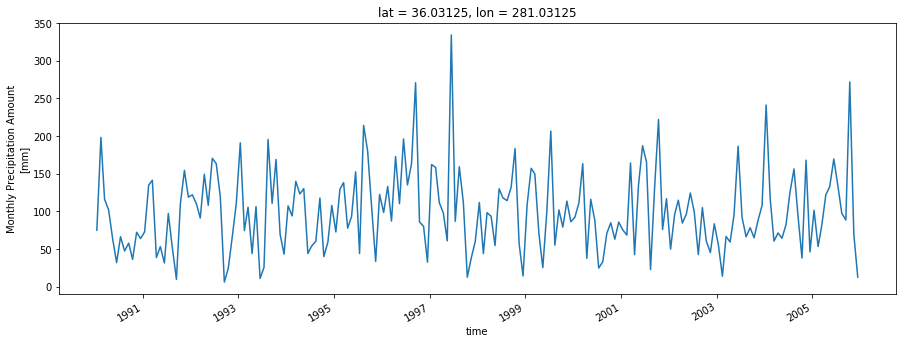

In [15]:
#Plot the time series
fig = plt.figure(figsize=(15,5))
ts_Precip.plot.line();

## Map precipitation for one time period

In [16]:
#Drop the lat and lon filters to grab data for all locations
theMapResult = ds.sel(time=theTime).precipitation

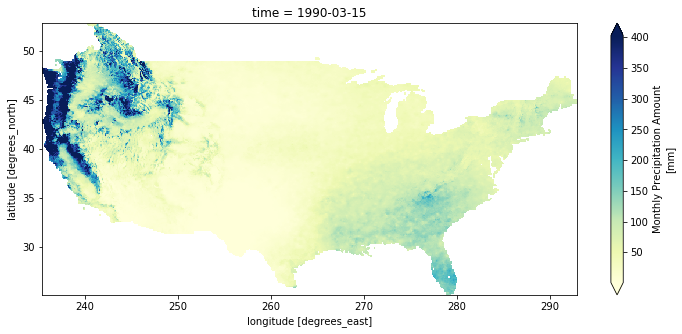

In [17]:
#Plot the data
fig = plt.figure(figsize=(12,5))
theMapResult.plot(cmap="YlGnBu", #Specifies the colors to use
                  robust=True);  #Drops outliers (<2%,>98%) from plot

## Create a spatial subset
We uses "slices" to extract subsets of data. Here we subset the data spatially and compute the mean

In [18]:
#Specify the spatial slices to grab
theLats = slice(25,36.5)
theLons = slice(360-91,360-76)

In [19]:
#Extract the spatial subset into its own data array
theSubset = ds.sel(lon=theLons,lat=theLats).precipitation

In [20]:
#Display the shape of the returned data array
theSubset.shape

(192, 182, 240)

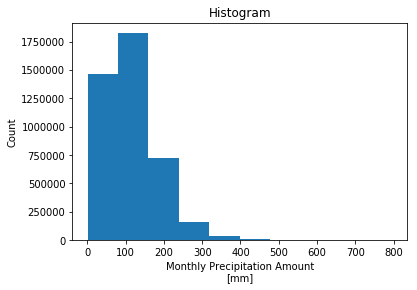

In [21]:
#Plot a histogram of the data within the subset
theSubset.plot();

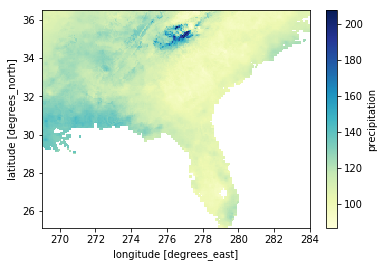

In [22]:
#Compute the mean across the time axis and show a map
theSubsetAvg = theSubset.mean(axis=0)
theSubsetAvg.plot(cmap="YlGnBu");

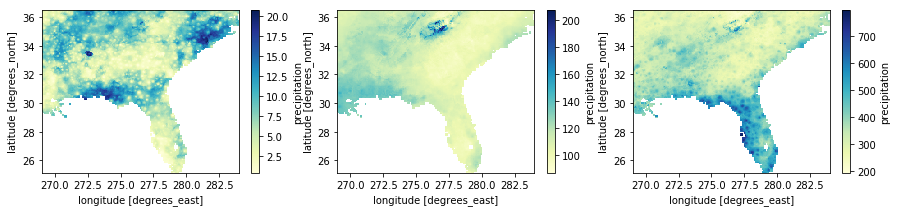

In [23]:
#Fancier plots
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
theSubset.min(axis=0).plot(cmap="YlGnBu")
plt.subplot(1,3,2)
theSubset.mean(axis=0).plot(cmap="YlGnBu")
plt.subplot(1,3,3)
theSubset.max(axis=0).plot(cmap="YlGnBu")
plt.show();

## Calculate summer (JJA) average
The `xarray` package supports seasons to make easy seasonal averages. 

In [24]:
#Create a new data array by converting the dates in the `time` array to seasons
arrSeason = ds['time'].dt.season

In [29]:
#Replace the time dimension with seasons
ds['time'] = ds['time'].dt.season

In [45]:
#Extract precipitation for just the summer months; we have 48 summers of data
summerPrecip = ds.sel(time='JJA',lat=theLats,lon=theLons).precipitation
summerPrecip.shape

(48, 182, 240)

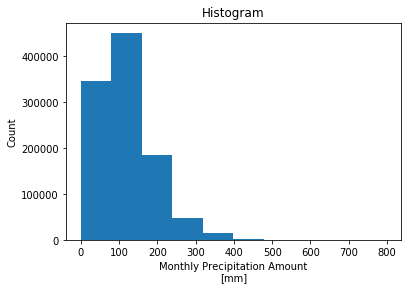

In [51]:
summerPrecip.plot();

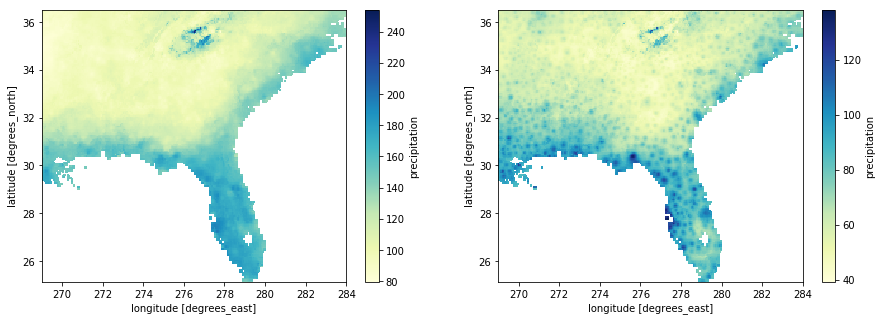

In [49]:
#Fancier plots
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
summerPrecip.mean(axis=0).plot(cmap="YlGnBu")
plt.subplot(1,2,2)
summerPrecip.std(axis=0).plot(cmap="YlGnBu")
#plt.subplot(1,3,3)
#summerPrecip.max(axis=0).plot(cmap="YlGnBu")
plt.show();